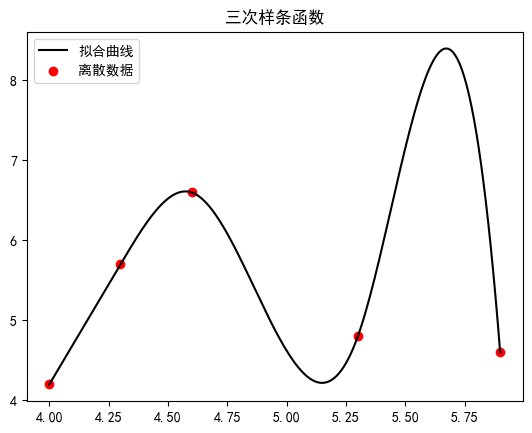

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
 
"""
三次样条实现：
函数的自变量x:3, 4.5, 7, 9
函数的因变量y:2.5, 10, 2.5, 10.5
"""
x = [4, 4.3, 4.6, 5.3, 5.9]
y = [4.2, 5.7, 6.6, 4.8, 4.6]
 
"""
功能：完后对三次样条函数求解方程参数的输入
参数：要进行三次样条曲线计算的自变量
返回值：方程的参数
"""
 
 
def calculateEquationParameters(x):
 
    '''
    代解未知数为a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3
    :param x:
    :return: parameter
    '''
    # parameter为二维数组，用来存放参数，sizeOfInterval是用来存放区间的个数
    parameter = []
    n = len(x)
    sizeOfInterval = n - 1  # 线段数
    i = 1
    # 首先输入方程两边相邻  节点  处函数值相等的方程为2(n-2)=4个方程; n个点要减去两个端点，然后乘以2
    while i <= n-2:
        # x[i]代入点i前一条线段的参数
        data = np.zeros(sizeOfInterval * 4)
        data[(i - 1) * 4] = x[i] * x[i] * x[i]
        data[(i - 1) * 4 + 1] = x[i] * x[i]
        data[(i - 1) * 4 + 2] = x[i]
        data[(i - 1) * 4 + 3] = 1
        # x[i]代入点i后一条线段的参数
        data1 = np.zeros(sizeOfInterval * 4)
        data1[i * 4] = x[i] * x[i] * x[i]
        data1[i * 4 + 1] = x[i] * x[i]
        data1[i * 4 + 2] = x[i]
        data1[i * 4 + 3] = 1
        parameter.append(data)
        parameter.append(data1)
        i += 1
    # 输入   端点   处的函数值。为2个方程
    data = np.zeros(sizeOfInterval * 4)
    # 第一条线段
    data[0] = x[0] * x[0] * x[0]
    data[1] = x[0] * x[0]
    data[2] = x[0]
    data[3] = 1
    parameter.append(data)
    data = np.zeros(sizeOfInterval * 4)
    # 最后一条线段
    data[-4] = x[-1] * x[-1] * x[-1]
    data[-3] = x[-1] * x[-1]
    data[-2] = x[-1]
    data[-1] = 1
    parameter.append(data)
 
    # 节点点函数一阶导数值相等为n-2=2个方程。
    i = 1
    while i <= n-2:
        data = np.zeros(sizeOfInterval * 4)
        data[(i - 1) * 4] = 3 * x[i] * x[i]
        data[(i - 1) * 4 + 1] = 2 * x[i]
        data[(i - 1) * 4 + 2] = 1
        data[i * 4] = -3 * x[i] * x[i]
        data[i * 4 + 1] = -2 * x[i]
        data[i * 4 + 2] = -1
        # temp = data[2:]
        # parameter.append(temp)
        parameter.append(data)
        i += 1
 
    # 节点函数二阶导数值相等为n-2=2个方程。且端点处的函数值的二阶导数为零，为2个方程。
    i = 1
    while i <= n-2:
        data = np.zeros(sizeOfInterval * 4)
        data[(i - 1) * 4] = 6 * x[i]
        data[(i - 1) * 4 + 1] = 2
        data[i * 4] = -6 * x[i]
        data[i * 4 + 1] = -2
        # temp = data[2:]
        # parameter.append(temp)
        parameter.append(data)
        i += 1
 
    # 总共2(n-1)-2=10个方程
    parameter = np.array(parameter)
    return parameter[:, 2:]  # 去掉前两个a1,b1
 
 
"""
功能：计算样条函数的系数。
参数：parametes为方程的系数，y为要插值函数的因变量。
返回值：三次插值函数的系数。
"""
 
 
def solutionOfEquation(parametes, y):
    n = len(x)
    sizeOfInterval = n - 1
    result = np.zeros(sizeOfInterval * 4 - 2)
    i = 1
    # 节点处方程右边
    while i < sizeOfInterval:  # result[0,1,2,3]
        result[(i - 1) * 2] = y[i]
        result[(i - 1) * 2 + 1] = y[i]
        i += 1
    # 起末端点处方程右边
    result[(sizeOfInterval - 1) * 2] = y[0]
    result[(sizeOfInterval - 1) * 2 + 1] = y[-1]
 
    a = np.array(parametes)
    b = np.array(result)
    return np.linalg.solve(a, b)  # 解线性方程组
 
 
"""
功能：根据所给参数，计算三次函数的函数值：
参数:parameters为二次函数的系数，x为自变量
返回值：为函数的因变量
"""
 
 
def calculate(paremeters, x):
    result = []
    for data_x in x:
        y = paremeters[0] * data_x * data_x * data_x + paremeters[1] * data_x * data_x + paremeters[2] * data_x + paremeters[3]
        result.append(y)
    return result
 
 
"""
功能：采点
参数：x
返回值：采取点和采取点的函数值
"""
 
 
def grasp_sample(x):
    n = len(x)
    i = 1
    # result 为求解出来后的a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3
    result = [0, 0]
    temp = solutionOfEquation(calculateEquationParameters(x), y)
    result.extend(temp)
    samples_x = []
    samples_y = []
    # n-1段曲线
    while i < n:
        sample_x = np.arange(x[i-1], x[i], 0.01)
        sample_y = calculate(result[(i-1)*4:i*4], sample_x)
        samples_x.extend(sample_x)
        samples_y.extend(sample_y)
        i = i+1
    samples_x.append(x[n-1])
    samples_y.extend(calculate(result[-4:], [x[n-1]]))
    return [samples_x, samples_y]
 
"""
功能：将函数绘制成图像
参数：data_x,data_y为离散的点.new_data_x,new_data_y为由拉格朗日插值函数计算的值。x为函数的预测值。
返回值：空
"""
 
 
def Draw(data_x, data_y, new_data_x, new_data_y):
    plt.plot(new_data_x, new_data_y, label="拟合曲线", color="black")
    plt.scatter(data_x, data_y, label="离散数据", color="red")
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.title("三次样条函数")
    plt.legend(loc="upper left")
    plt.show()
 
 
samples = grasp_sample(x)
# print(samples[0])
# print(samples[1])
Draw(x, y, samples[0], samples[1])

